Реализация проекта с учетом реккомендаций.

In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import mdl_preprocessing as preproc
import mdl_analysis as analysis
import mdl_outliers as outliers
import mdl_visualization as visual
import mdl_regressor as regress
import csv

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = kagglehub.dataset_download("mrdaniilak/russia-real-estate-2021")
print(file_path)
sys.path.append(file_path)
path = file_path+'/input_data.csv'

dataset = loader.load_csv_file(path)

/root/.cache/kagglehub/datasets/mrdaniilak/russia-real-estate-2021/versions/1
Данные успешно загружены.


In [2]:
# Берем объекты только по московскому региону
dataset = dataset[(dataset['id_region'] == 77)]
# Делаем конвертацию RUB в USD
conversion_rate = 0.012
dataset['price'] = dataset['price'] * conversion_rate
# Смотрим самую дорогую недвижимость
dataset_sort = dataset.sort_values(by='price', ascending=False)
print(dataset_sort[:20])
# Смотрим количество объектов
print(len(dataset))
# Смотрим максимальную и минимальную стоимость объектов
min_price = dataset['price'].min()
max_price = dataset['price'].max()
print(f"Минимальная цена: {min_price}")
print(f"Максимальная цена: {max_price}")

<ipython-input-2-f271d9181c3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price'] = dataset['price'] * conversion_rate


               date         price  level  levels  rooms   area  kitchen_area  \
2652158  2021-04-03  3.195083e+08      2       8      4  245.0          23.0   
7570734  2021-09-03  2.047461e+08      3       7      4  173.0          25.0   
7114173  2021-08-22  1.503640e+08      3       6      5  256.0           0.0   
6286159  2021-07-28  1.245948e+08      6      13      4  165.0          18.0   
3114888  2021-04-18  1.198800e+08     14      17      2   54.0          10.0   
9067312  2021-10-18  1.182869e+08      8      17      3   77.0          10.0   
7474190  2021-09-01  1.182798e+08      5       5      2   32.0           8.0   
4800276  2021-06-15  1.176000e+08      6       9      2   37.0           8.0   
1553369  2021-03-01  1.164000e+08      5       8      2   43.0           6.5   
7116954  2021-08-23  1.160477e+08      8      10      1   31.8           6.0   
9729972  2021-11-08  1.155596e+08     10      14      3   89.6          20.0   
2080281  2021-03-18  1.104000e+08      2

In [3]:
# Ограничиваем стоимость от 10т до 1млн
dataset = dataset[(dataset['price'] > 10000) & (dataset['price'] < 1000000)]
# Смотрим количество объектов
print(len(dataset))

999361


In [4]:
!pip install matplotlib

In [ ]:
# Статисчтическая информация объектов
analysis.statistic_data(dataset)

First 5 records:            date      price  level  levels  rooms   area  kitchen_area  \
10   2021-01-01   40200.00      1      19     -1   10.1           2.0   
36   2021-01-01  360000.00     11      22      3  109.0          15.5   
38   2021-01-01  265351.68      8      29      3   69.8          11.6   
140  2021-01-01   88800.00      9       9      1   32.3           5.2   
150  2021-01-01   36000.00      1       5      1   13.6           2.0   

       geo_lat    geo_lon  building_type  object_type  postal_code  street_id  \
10   55.778026  37.540147              3            0     123007.0   580339.0   
36   55.702794  37.666153              3            0     115432.0   451495.0   
38   55.834958  37.637378              0            2     129226.0   201942.0   
140  55.766357  37.712868              3            0     111020.0   394412.0   
150  55.740164  37.546994              4            0     121165.0   152778.0   

     id_region   house_id  
10          77  2069062.0  
3

In [ ]:
# Анализ нулевых данных (цены нулевые не будут, но оставила, если понадобится при другой выборке)
analysis.analysis_data(dataset)

price <= 0 : 0
% price <= 0 : 0.0%
level <= 0 : 15
% level <= 0 : 0.0015%
levels <= 0 : 124
% levels <= 0 : 0.01241%
rooms <= 0 : 104914
% rooms <= 0 : 10.49811%
kitchen_area <= 0 : 273226
% kitchen_area <= 0 : 27.34007%


In [5]:
# Предобработка датасета с реккомендациями
dataset = preproc.preprocessing_data_recommend(dataset)

Всего: 909593
                                date          price          level  \
count                         909593  909593.000000  909593.000000   
mean   2021-07-06 16:42:44.821848576  201440.478441       9.316823   
min              2021-01-01 00:00:00   10200.000000       1.000000   
25%              2021-03-31 00:00:00  113460.000000       4.000000   
50%              2021-07-11 00:00:00  156000.000000       8.000000   
75%              2021-10-06 00:00:00  233640.000000      13.000000   
max              2021-12-31 00:00:00  999823.908000      50.000000   
std                              NaN  144616.944943       7.049550   

              levels          rooms           area   kitchen_area  \
count  909593.000000  909593.000000  909593.000000  909593.000000   
mean       17.648170       1.762302      56.892484      12.106678   
min         1.000000      -1.000000       4.000000       0.050000   
25%        12.000000       1.000000      38.100000       8.500000   
50%       

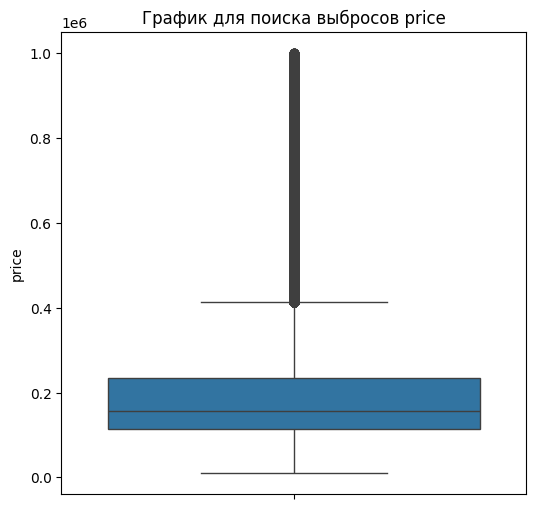

График сохранен: sample_data/outputs_recommend/outliers_price.png


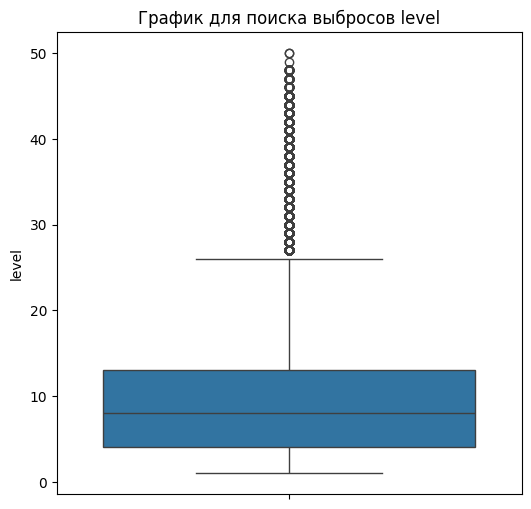

График сохранен: sample_data/outputs_recommend/outliers_level.png


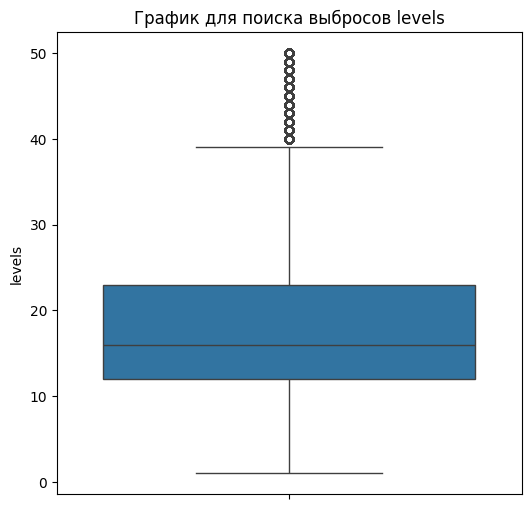

График сохранен: sample_data/outputs_recommend/outliers_levels.png


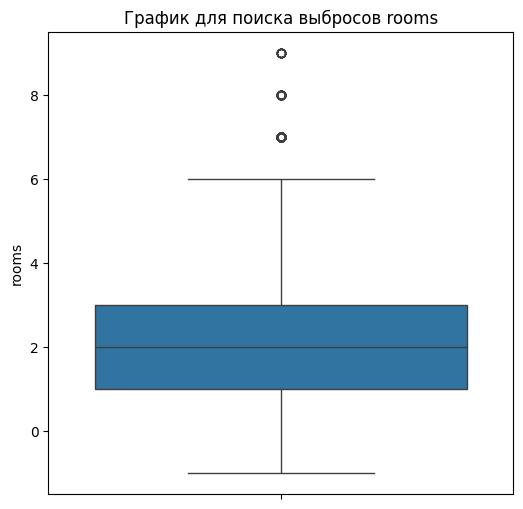

График сохранен: sample_data/outputs_recommend/outliers_rooms.png


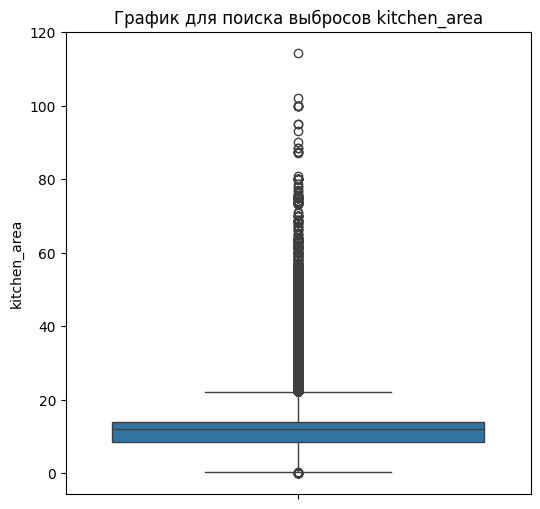

График сохранен: sample_data/outputs_recommend/outliers_kitchen_area.png


In [ ]:
# Графики выборосов
columns_for_outliers = ['price', 'level', 'levels', 'rooms', 'kitchen_area']
for column in columns_for_outliers:
  visual.visual_outliers_data(dataset, column)

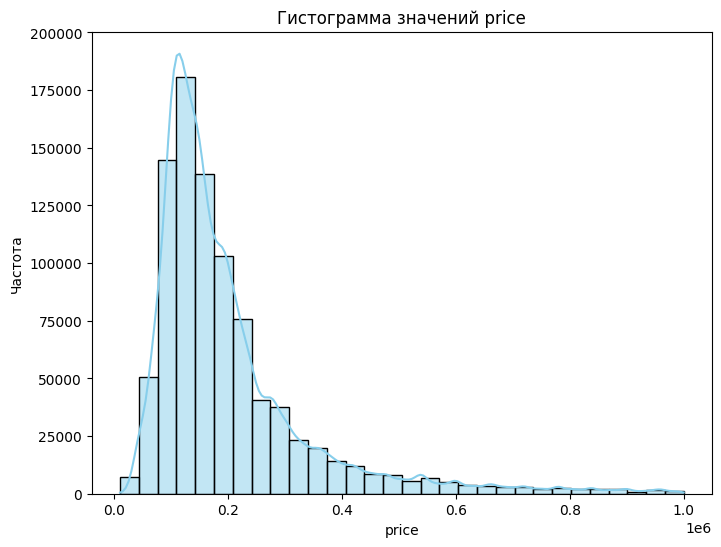

График сохранен: sample_data/outputs_recommend/distribution_price.png

Описание целевой переменной:
count    909593.000000
mean     201440.478441
std      144616.944943
min       10200.000000
25%      113460.000000
50%      156000.000000
75%      233640.000000
max      999823.908000
Name: price, dtype: float64


In [ ]:
# Визуализация нормальности распределения target
visual.visual_hist_target(dataset, 'price')

In [6]:
# Подсчет и удаление выбросов
columns_for_outliers = ['price', 'level', 'levels', 'rooms', 'kitchen_area']
dataset = outliers.outliers_data(dataset, columns_for_outliers)

Всего price выбросов: 24458 
Всего level выбросов: 12503 
Всего levels выбросов: 8349 
Всего rooms выбросов: 1192 
Всего kitchen_area выбросов: 14027 
Всего: 895566
                                date          price          level  \
count                         895566  895566.000000  895566.000000   
mean   2021-07-06 20:05:19.622673664  197320.749829       9.278514   
min              2021-01-01 00:00:00   10200.000000       1.000000   
25%              2021-04-01 00:00:00  112800.000000       4.000000   
50%              2021-07-12 00:00:00  155603.460000       8.000000   
75%              2021-10-06 00:00:00  228000.000000      13.000000   
max              2021-12-31 00:00:00  999823.908000      50.000000   
std                              NaN  139340.491599       7.024058   

              levels          rooms           area   kitchen_area  \
count  895566.000000  895566.000000  895566.000000  895566.000000   
mean       17.588169       1.742201      56.065518      11.747227 

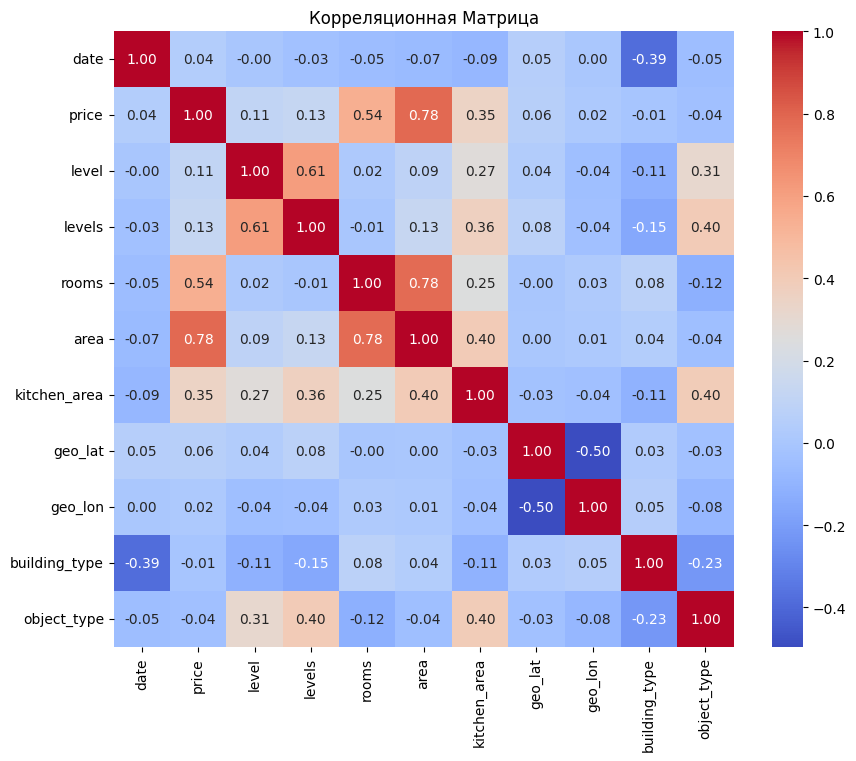

График сохранен: sample_data/outputs_recommend/correlation_matrix.png


In [ ]:
# Визуализация матрицы кореляций
analysis.corr_data(dataset)

/content/sample_data/mdl_visualization.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs_recommend/date_by_price.png


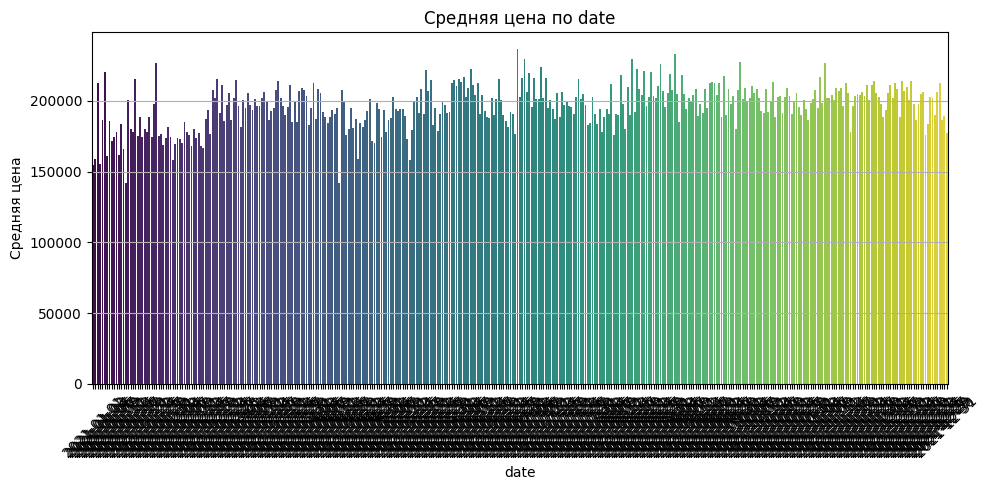

/content/sample_data/mdl_visualization.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs_recommend/level_by_price.png


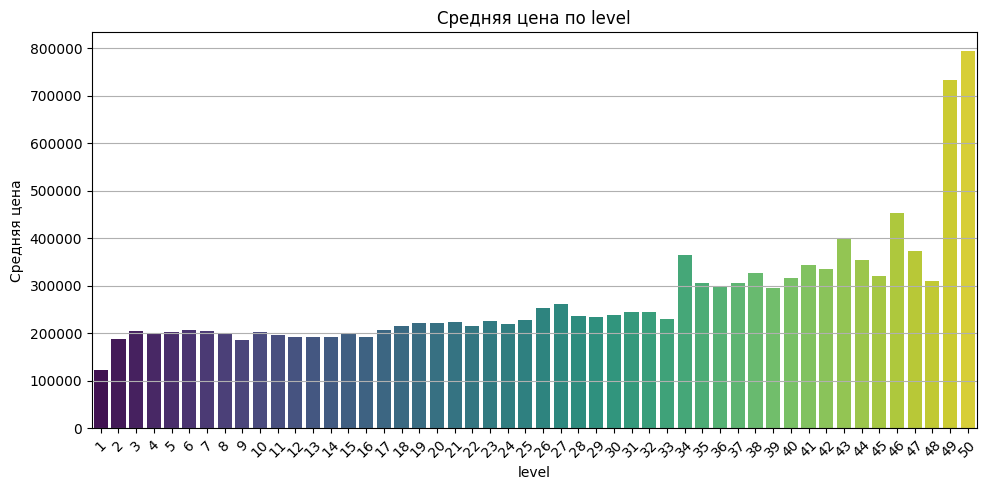

/content/sample_data/mdl_visualization.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs_recommend/levels_by_price.png


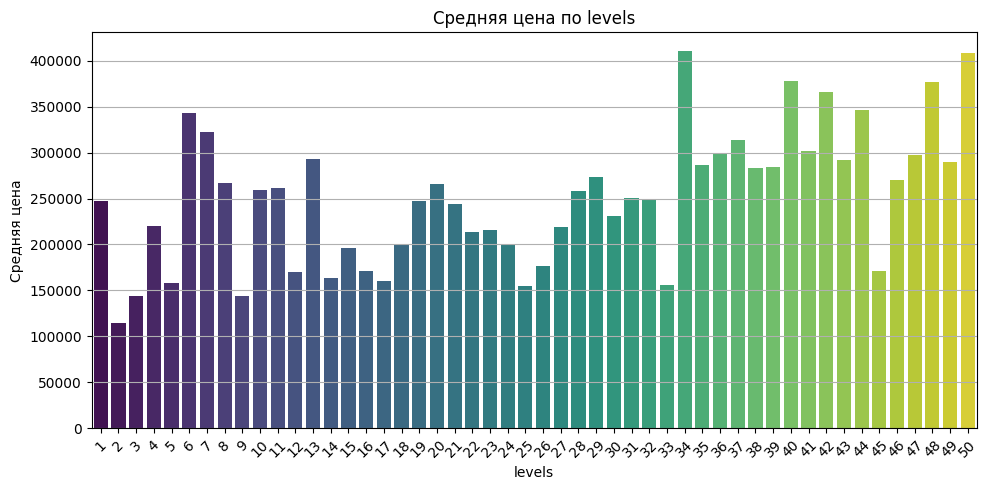

/content/sample_data/mdl_visualization.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='price', data=grouped_data, palette='viridis')


График сохранен: sample_data/outputs_recommend/building_type_by_price.png


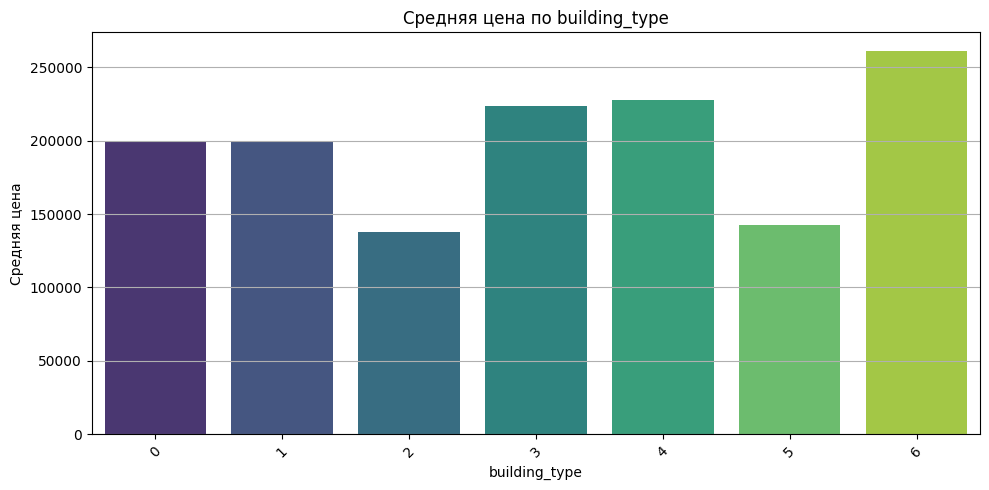

In [ ]:
# Визуализация признаков по цене
columns_for_by_price = ['date', 'level', 'levels', 'building_type']
for column in columns_for_by_price:
  visual.visual_by_price(dataset, column)

In [7]:
# Преобразование даты в int
dataset = preproc.transform_date_to_int(dataset, 'date')

Метрики модели: XGBoost
             MAE           MSE     RMSE     R²  Time(s)
XGBoost  33591.0  3.513009e+09  59271.0  0.819      3.6


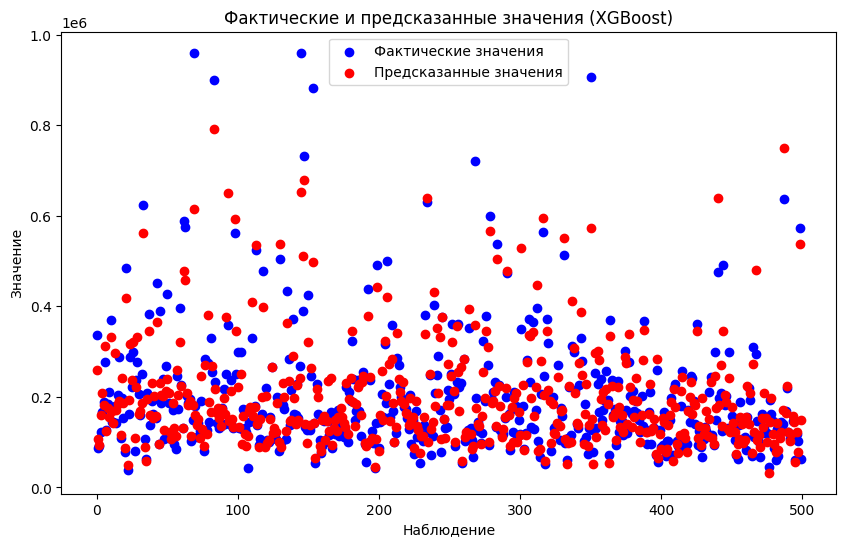

График сохранен: sample_data/outputs_recommend/predictions_XGBoost.png
Метрики модели: XGBoost
             MAE           MSE     RMSE     R²  Time(s)
XGBoost  33591.0  3.513009e+09  59271.0  0.819      3.6


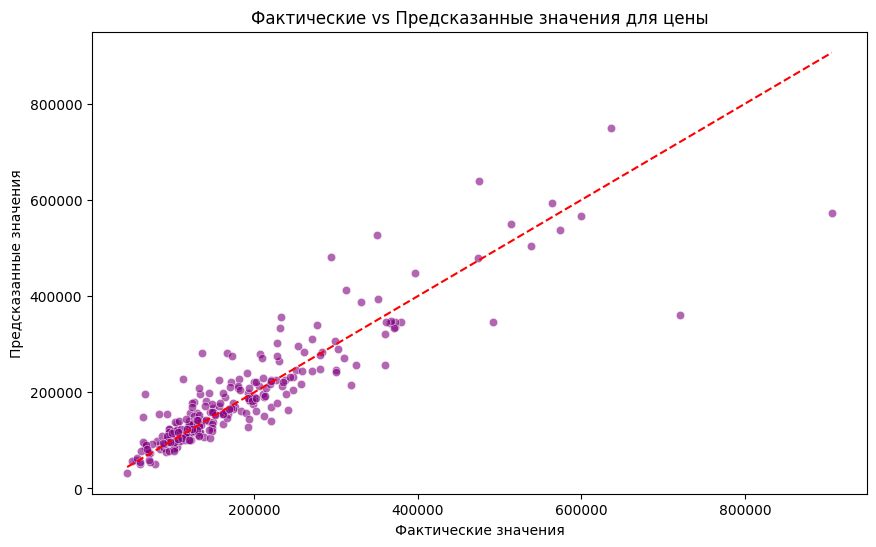

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_XGBoost.png
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 716452, number of used features: 10
[LightGBM] [Info] Start training from score 197386.405959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

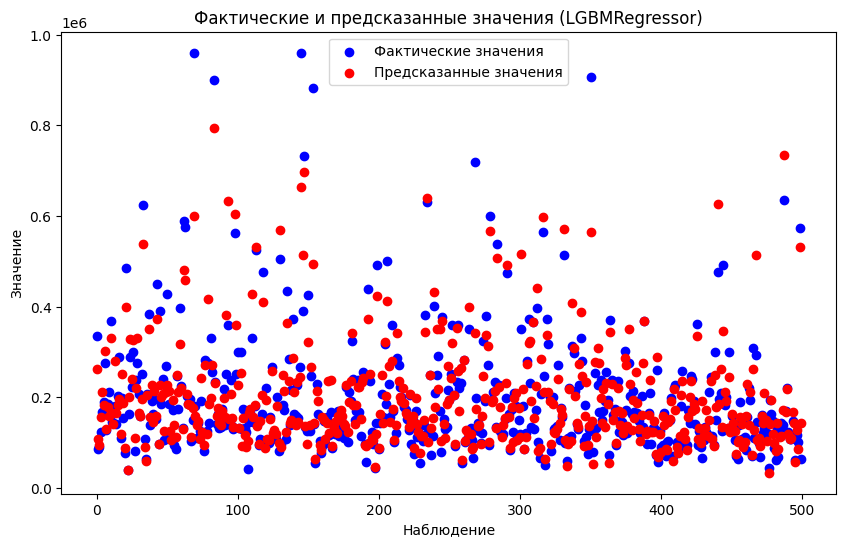

График сохранен: sample_data/outputs_recommend/predictions_LGBMRegressor.png
Метрики модели: LGBMRegressor
                   MAE           MSE     RMSE      R²  Time(s)
XGBoost        33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor  33702.0  3.549405e+09  59577.0  0.8172      5.6


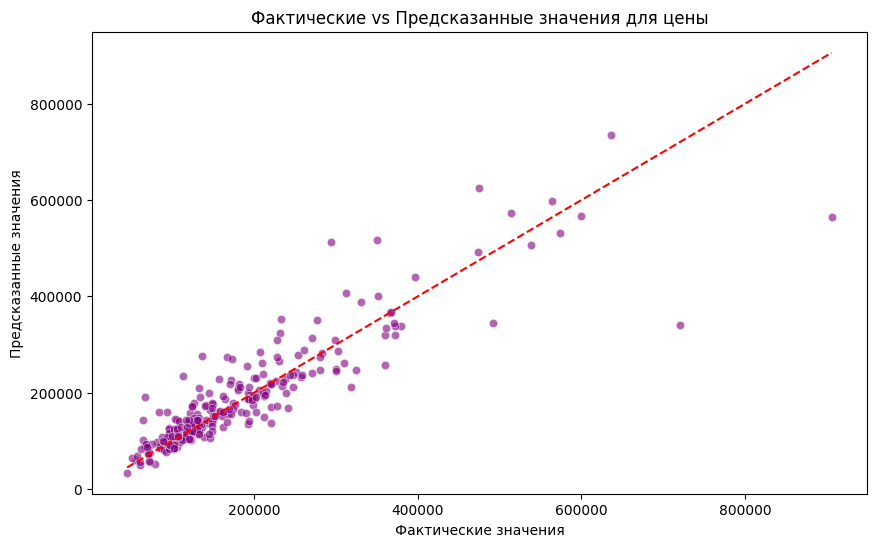

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_LGBMRegressor.png
Метрики модели: Gradient Boosting
                       MAE           MSE     RMSE      R²  Time(s)
XGBoost            33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor      33702.0  3.549405e+09  59577.0  0.8172      5.6
Gradient Boosting  33536.0  3.497641e+09  59141.0  0.8198    190.1


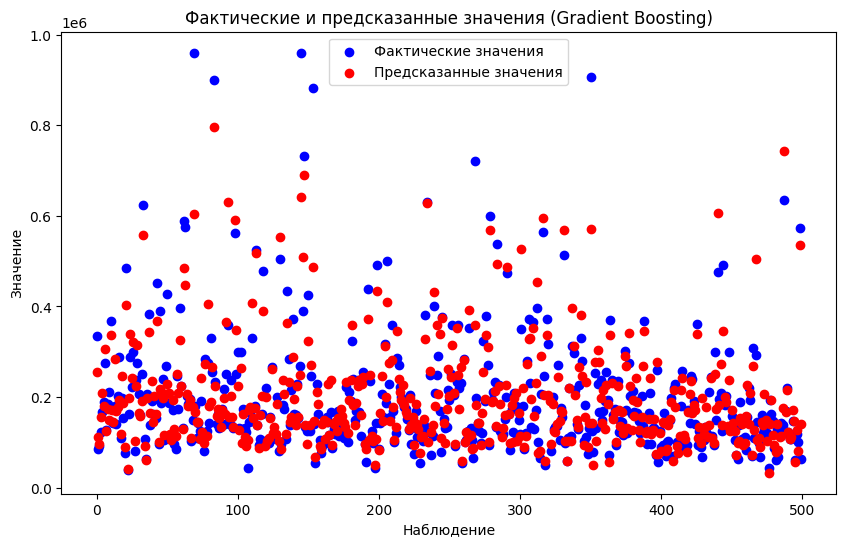

График сохранен: sample_data/outputs_recommend/predictions_Gradient Boosting.png
Метрики модели: Gradient Boosting
                       MAE           MSE     RMSE      R²  Time(s)
XGBoost            33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor      33702.0  3.549405e+09  59577.0  0.8172      5.6
Gradient Boosting  33536.0  3.497641e+09  59141.0  0.8198    190.1


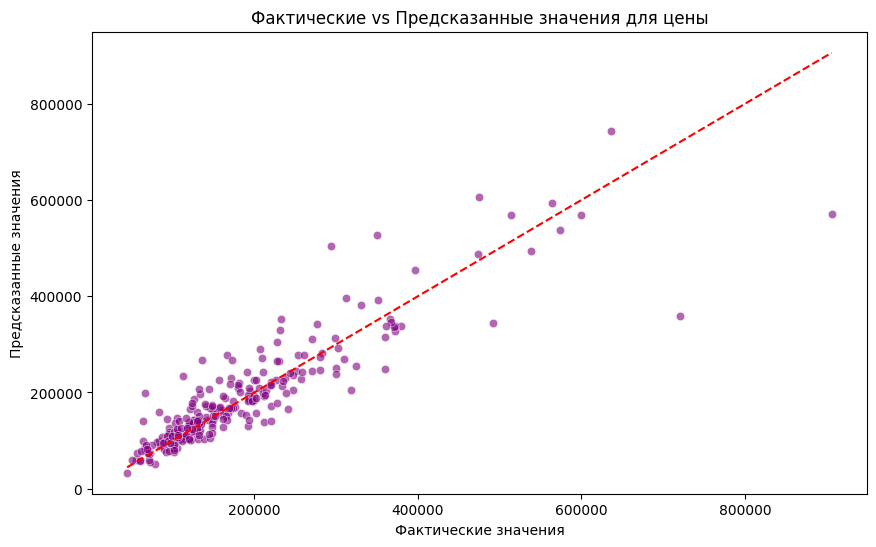

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_Gradient Boosting.png
Метрики модели: DecisionTreeRegressor
                           MAE           MSE     RMSE      R²  Time(s)
XGBoost                33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor          33702.0  3.549405e+09  59577.0  0.8172      5.6
Gradient Boosting      33536.0  3.497641e+09  59141.0  0.8198    190.1
DecisionTreeRegressor  11550.0  1.192513e+09  34533.0  0.9386      9.9


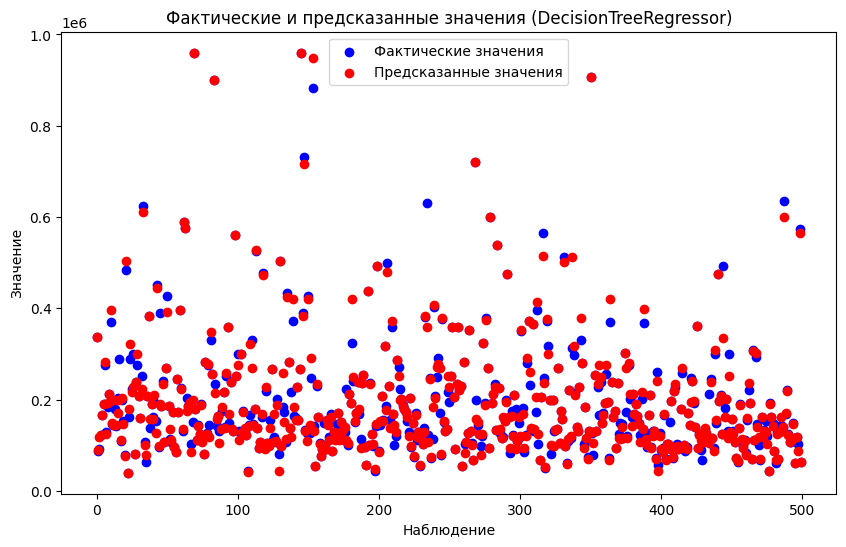

График сохранен: sample_data/outputs_recommend/predictions_DecisionTreeRegressor.png
Метрики модели: DecisionTreeRegressor
                           MAE           MSE     RMSE      R²  Time(s)
XGBoost                33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor          33702.0  3.549405e+09  59577.0  0.8172      5.6
Gradient Boosting      33536.0  3.497641e+09  59141.0  0.8198    190.1
DecisionTreeRegressor  11550.0  1.192513e+09  34533.0  0.9386      9.9


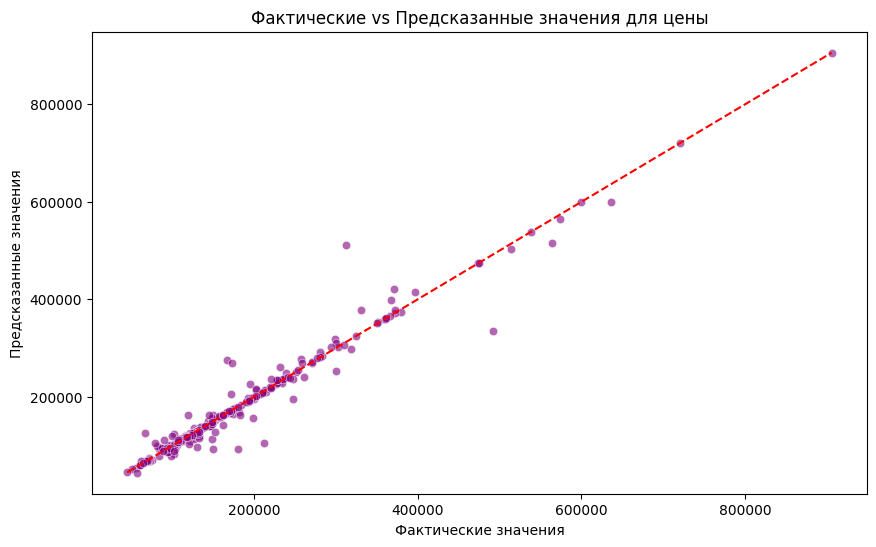

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_DecisionTreeRegressor.png
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 716452, number of used features: 10
[LightGBM] [Info] Start training from score 197386.405959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

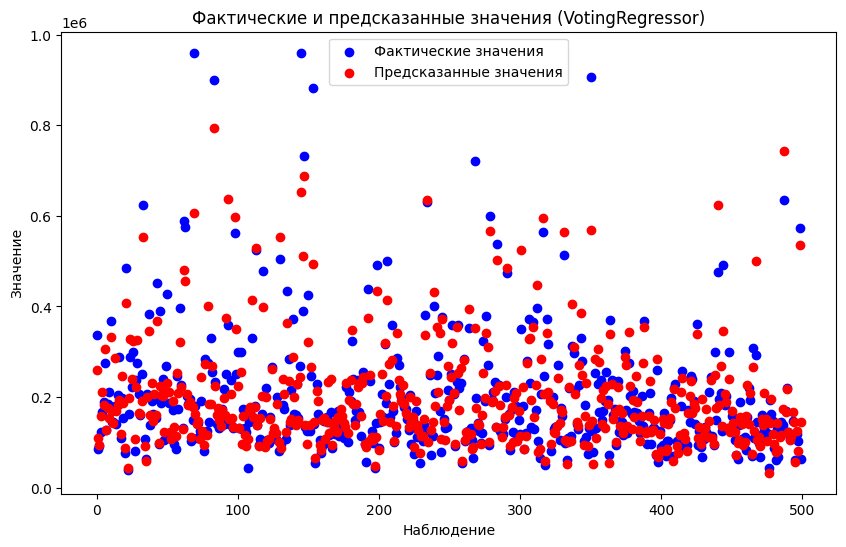

График сохранен: sample_data/outputs_recommend/predictions_VotingRegressor.png
Метрики модели: VotingRegressor
                           MAE           MSE     RMSE      R²  Time(s)
XGBoost                33591.0  3.513009e+09  59271.0  0.8190      3.6
LGBMRegressor          33702.0  3.549405e+09  59577.0  0.8172      5.6
Gradient Boosting      33536.0  3.497641e+09  59141.0  0.8198    190.1
DecisionTreeRegressor  11550.0  1.192513e+09  34533.0  0.9386      9.9
VotingRegressor        33478.0  3.503590e+09  59191.0  0.8195    188.3


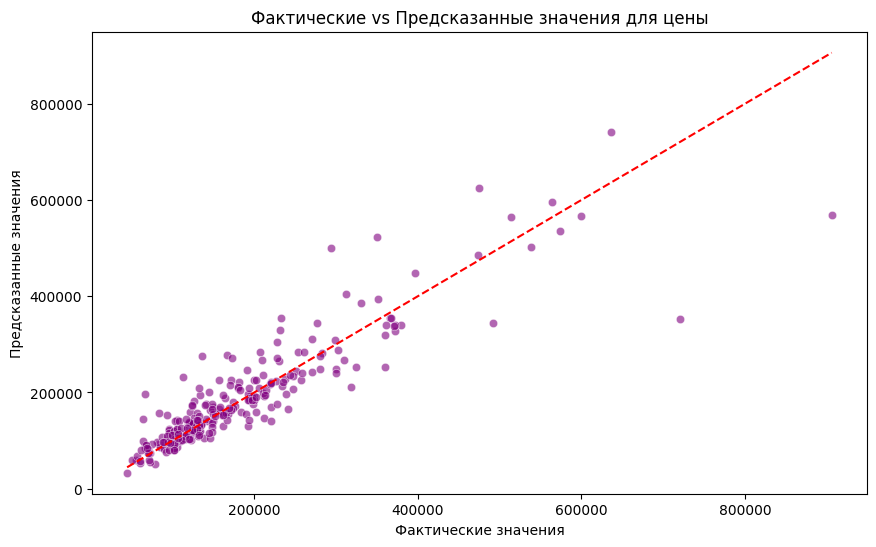

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_VotingRegressor.png


In [8]:
# Обучение моделей
metrics = regress.regressor_data(dataset)

Сравнение моделей по метрикам:
                           MAE           MSE     RMSE      R²  Time(s)
XGBoost                33591.0  3.513009e+09  59271.0  0.8190      4.8
LGBMRegressor          33702.0  3.549405e+09  59577.0  0.8172      7.0
Gradient Boosting      33536.0  3.497641e+09  59141.0  0.8198    204.2
DecisionTreeRegressor  11550.0  1.192513e+09  34533.0  0.9386     12.2
VotingRegressor        33478.0  3.503590e+09  59191.0  0.8195    219.1


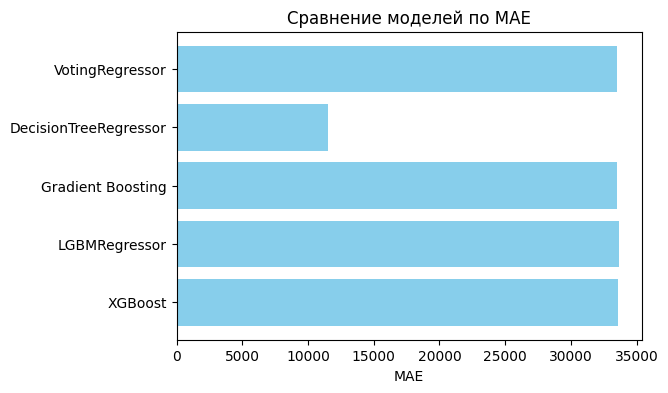

График сохранен: sample_data/outputs_recommend/metrics_MAE.png


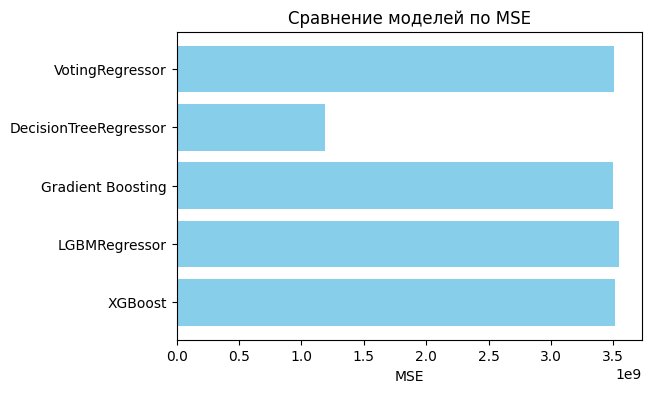

График сохранен: sample_data/outputs_recommend/metrics_MSE.png


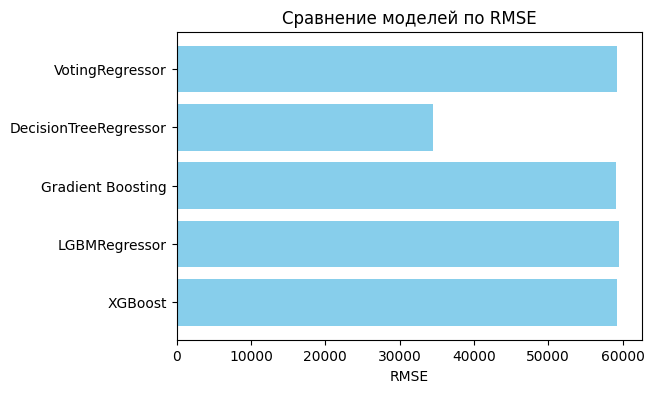

График сохранен: sample_data/outputs_recommend/metrics_RMSE.png


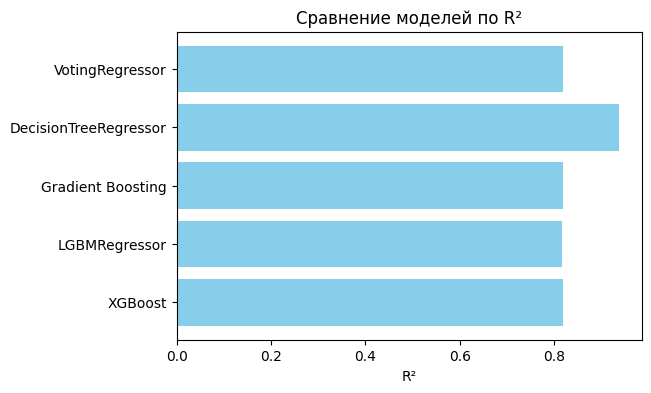

График сохранен: sample_data/outputs_recommend/metrics_R².png


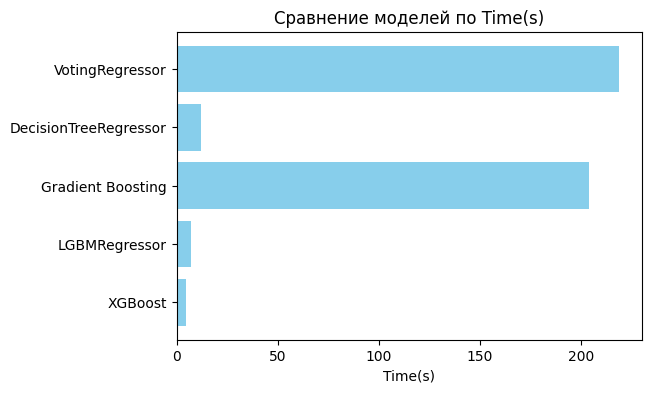

График сохранен: sample_data/outputs_recommend/metrics_Time(s).png


In [ ]:
# Сравнение метрик
visual.visual_metrics(metrics)

In [ ]:
# Подбор параметров для DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop(['price', 'rooms'], axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Определение параметров для подбора
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 15, 20, 25],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [5, 10, 15]
}

# Определение модели
model = DecisionTreeRegressor(random_state=42)

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Лучшие параметры: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_split': 10}
Лучшая точность (CV): -1340143063.678031


*****************
Метрики качества:
*****************
MAE: 14003.3853
MSE: 1146273075.6418
RMSE: 33856.6548
R²: 0.9410


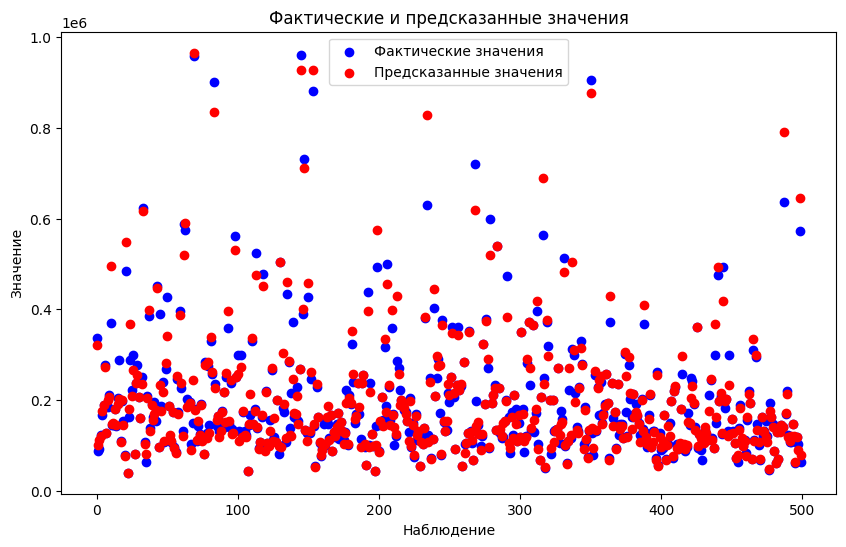

График сохранен: sample_data/outputs_recommend/predictions_DecisionTreeRegressor_best.png


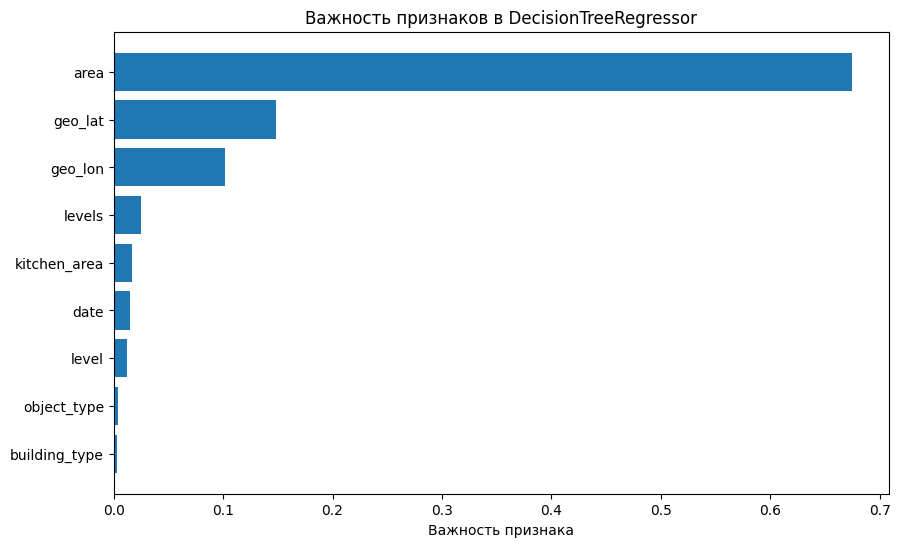

График сохранен: sample_data/outputs_recommend/important_features_DecisionTreeRegressor.png


In [ ]:
# Создание и обучение модели DecisionTreeRegressor с лучшими параметрами
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop(['price', 'rooms'], axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_DecisionTreeRegressor = DecisionTreeRegressor(random_state=42,
                              criterion='friedman_mse',
                              max_depth=None,
                              max_features=None,
                              min_samples_split=10,
                              min_samples_leaf=5) # параметры
model_DecisionTreeRegressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_DecisionTreeRegressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Для визуализации берем срез значений
start_index = 5000
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test[start_index:end_index])), y_test[start_index:end_index], color='blue', label='Фактические значения')
plt.scatter(range(len(y_test[start_index:end_index])), y_pred[start_index:end_index], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions_DecisionTreeRegressor_best.png'
visual.save_plot(fig, name_file)

# Визуализируем важность признаков
model_DecisionTreeRegressor.fit(X_train, y_train)
feature_importances = model_DecisionTreeRegressor.feature_importances_
feature_names = X_test.columns
sorted_idx = np.argsort(feature_importances)

fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Важность признака')
plt.title('Важность признаков в DecisionTreeRegressor')
plt.show()
name_file = f'important_features_DecisionTreeRegressor.png'
visual.save_plot(fig, name_file)


*****************
Метрики качества:
*****************
MAE: 9748.8999
MSE: 596927406.3664
RMSE: 24432.0979
R²: 0.9693


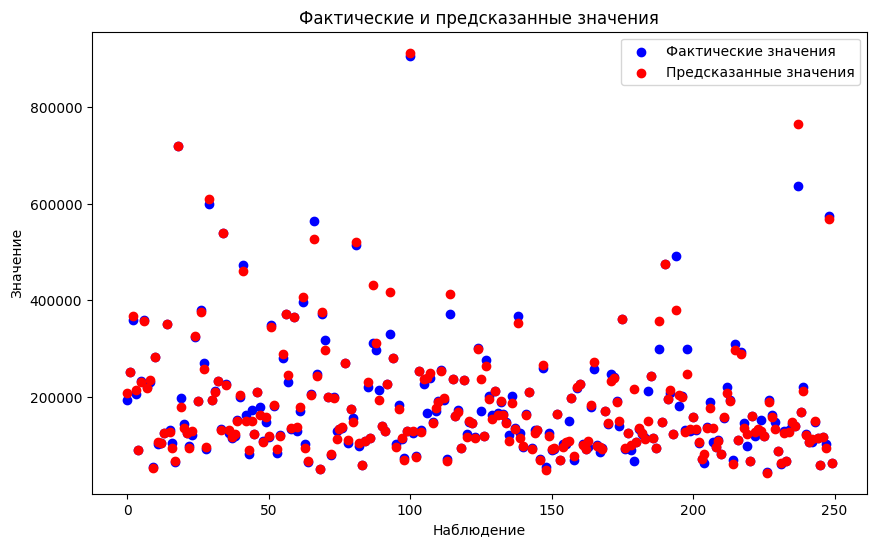

График сохранен: sample_data/outputs_recommend/predictions_XGBRegressor_best.png


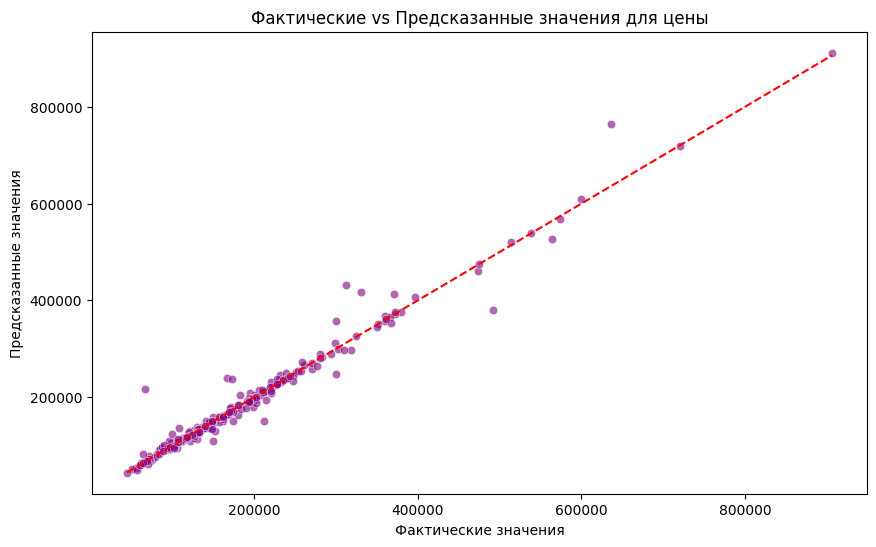

График сохранен: sample_data/outputs_recommend/predictions_scatterplot_XGBRegressor_best.png


In [9]:
# XGBRegressor с параметрами
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop(['price'], axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_XGBRegressor = XGBRegressor(random_state=42,
                     n_estimators=300,
                     learning_rate=0.1,
                     max_depth=20,
                     min_child_weight=5,
                     objective='reg:squarederror') # параметры
model_XGBRegressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_XGBRegressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Для визуализации берем срез значений
start_index = 5250
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test[start_index:end_index])), y_test[start_index:end_index], color='blue', label='Фактические значения')
plt.scatter(range(len(y_test[start_index:end_index])), y_pred[start_index:end_index], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions_XGBRegressor_best.png'
visual.save_plot(fig, name_file)

# Диаграмма предсказанных vs фактических значений для целевой переменной
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test[start_index:end_index], y=y_pred[start_index:end_index], color='purple', alpha=0.6)
plt.plot([y_test[start_index:end_index].min(), y_test[start_index:end_index].max()], [y_test[start_index:end_index].min(), y_test[start_index:end_index].max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Фактические vs Предсказанные значения для цены')
plt.show()
name_file = f'predictions_scatterplot_XGBRegressor_best.png'
visual.save_plot(fig, name_file)

In [ ]:
# Тестируем на выборке из 5 объектов
# ['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon', 'building_type', 'object_type', '']
from sklearn.preprocessing import StandardScaler
dataset_test = {
    'date': [1609459200, 1609459200, 1609459200, 1609459200, 1609459200],
    'level': [1, 9, 3, 4, 14],
    'levels': [19, 9, 22, 18, 16],
    'rooms': [-1, 1, 3, 4, 1],
    'area': [10.1, 32.3, 100.1, 92.9, 38.6],
    'kitchen_area': [2.0, 5.2, 15.0, 12.0, 16.3],
    'geo_lat': [55.778026, 55.766357, 55.694451, 55.703682, 55.590612],
    'geo_lon': [37.540147, 37.712868, 37.470214, 37.774426, 37.446138],
    'building_type': [3, 3, 0, 2, 0],
    'object_type': [0, 0, 0, 0, 2]
}
df = pd.DataFrame(dataset_test)
df.scaler = StandardScaler()
dataset_price = {'price': [40200.000, 88800.000, 270000.000, 252000.000, 85315.872]}

# Предсказание на тестовой выборке
dataset_predict = model_XGBRegressor.predict(df)
print(f'Предсказанные цены: {dataset_predict}')
print(f'Реальные цены: {dataset_price["price"]}')

Предсказанные цены: [ 40096.387  88544.74  270967.62  252089.42   85902.25 ]
Реальные цены: [40200.0, 88800.0, 270000.0, 252000.0, 85315.872]


In [ ]:
!pip uninstall catboost
!pip install catboost

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Would remove:
    /usr/local/etc/jupyter/nbconfig/notebook.d/catboost-widget.json
    /usr/local/lib/python3.11/dist-packages/catboost-1.2.7.dist-info/*
    /usr/local/lib/python3.11/dist-packages/catboost/*
    /usr/local/share/jupyter/labextensions/catboost-widget/package.json
    /usr/local/share/jupyter/labextensions/catboost-widget/static/138.1b18795f1631648f3df1.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/479.d43617224b25ecf15b1d.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/479.d43617224b25ecf15b1d.js.LICENSE.txt
    /usr/local/share/jupyter/labextensions/catboost-widget/static/486.bafd26b008c3405f7750.js
    /usr/local/share/jupyter/labextensions/catboost-widget/static/486.bafd26b008c3405f7750.js.LICENSE.txt
    /usr/local/share/jupyter/labextensions/catboost-widget/static/755.297bcad6e07632169fc2.js
    /usr/local/share/jupyter/labextensions/catboost-widge

*****************
Метрики качества:
*****************
MAE: 22244.2371
MSE: 1652861880.7494
RMSE: 40655.4041
R²: 0.9149


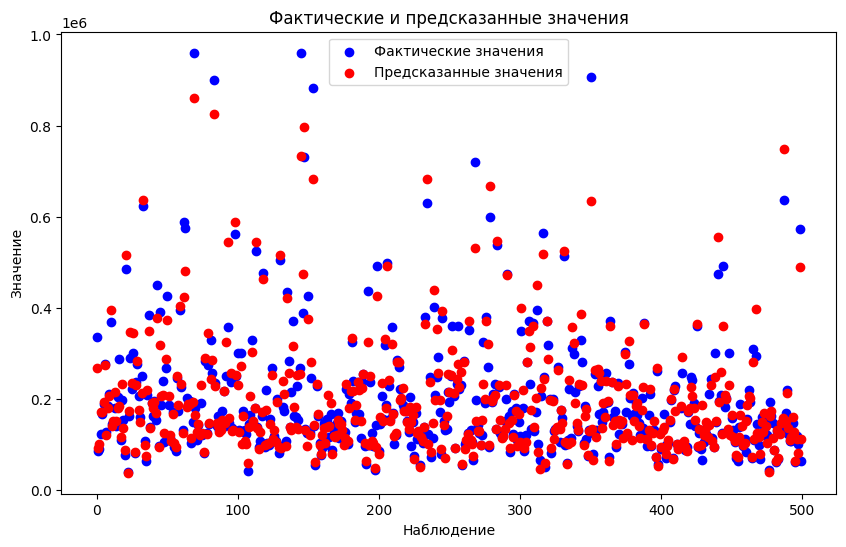

График сохранен: sample_data/outputs_recommend/predictions_CatBoostRegressor_best.png


In [ ]:
# CatBoostRegressor с параметрами
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop(['price'], axis=1)  # Все столбцы, кроме target
y = dataset['price']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model_CatBoostRegressor = CatBoostRegressor(random_state=42,
                     iterations=500,
                     learning_rate=0.05,
                     depth=10,
                     verbose=0) # параметры
model_CatBoostRegressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_CatBoostRegressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Для визуализации берем срез значений
start_index = 5000
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test[start_index:end_index])), y_test[start_index:end_index], color='blue', label='Фактические значения')
plt.scatter(range(len(y_test[start_index:end_index])), y_pred[start_index:end_index], color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions_CatBoostRegressor_best.png'
visual.save_plot(fig, name_file)

In [ ]:
# Тестируем на выборке из 5 объектов
# ['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon', 'building_type', 'object_type', '']
from sklearn.preprocessing import StandardScaler
dataset_test = {
    'date': [1609459200, 1609459200, 1609459200, 1609459200, 1609459200],
    'level': [1, 9, 3, 4, 14],
    'levels': [19, 9, 22, 18, 16],
    'rooms': [-1, 1, 3, 4, 1],
    'area': [10.1, 32.3, 100.1, 92.9, 38.6],
    'kitchen_area': [2.0, 5.2, 15.0, 12.0, 16.3],
    'geo_lat': [55.778026, 55.766357, 55.694451, 55.703682, 55.590612],
    'geo_lon': [37.540147, 37.712868, 37.470214, 37.774426, 37.446138],
    'building_type': [3, 3, 0, 2, 0],
    'object_type': [0, 0, 0, 0, 2]
}
df = pd.DataFrame(dataset_test)
df.scaler = StandardScaler()
dataset_price = {'price': [40200.000, 88800.000, 270000.000, 252000.000, 85315.872]}

# Предсказание на тестовой выборке
dataset_predict = model_CatBoostRegressor.predict(df)
print(f'Предсказанные цены: {dataset_predict}')
print(f'Реальные цены: {dataset_price["price"]}')

Предсказанные цены: [ 50716.2298198  106810.04954549 381073.49178829 207462.69559512
  91913.40412434]
Реальные цены: [40200.0, 88800.0, 270000.0, 252000.0, 85315.872]


In [ ]:
# Лучшие метрики XGBRegressor, но с добавлением параметров
# Неплохие метрики у DecisionTreeRegressor с подбором параметров
# CatBoostRegressor дает достаточно большую абсалютную ошибку и сильно недопредсказывает дорогую недвижимость